In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Read the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# View the first 5 rows
FoodieBay_data.head(8)

,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,NaN,13,4.750000,3.6
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,NaN,28,4.500000,3.8
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Basavanagudi,Quick Bites,"South Indian, Healthy Food",[],Delivery,Jayanagar,Yes,No,200.0,NaN,18,4.000000,3.9
3,https://www.zomato.com/bangalore/red-onion-sha...,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Shanti Nagar,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Delivery,Brigade Road,Yes,Yes,1200.0,"Fish, Dumplings, Biryani, Paneer Tikka Masala,...",550,4.800000,4.3
4,https://www.zomato.com/bangalore/chaiywaala-da...,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,New BEL Road,Cafe,"Cafe, Tea",[],Dine-out,New BEL Road,Yes,No,250.0,"Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...",67,3.000000,3.7
5,https://www.zomato.com/bangalore/alter-ego-dde...,"210, 5th A Cross Road, HRBR Layout 3rd Block, ...",Alter Ego D'Deli,080 48651581\r\n+91 9880459084,Kalyan Nagar,Cafe,"Cafe, Continental, Italian, Burger, Pizza, Sal...","['Chicken Steak', 'Beef Steak', 'Pork Steak', ...",Cafes,Kammanahalli,Yes,No,650.0,"Pizza, Burgers, Chicken Pasta, Minestrone Soup...",140,3.500000,3.8
6,https://www.zomato.com/bangalore/banashankari-...,"3B, 1st Main, Koramangala 7th Block, Bangalore",Banashankari Donne Biriyani,+91 7975339058,Koramangala 7th Block,Quick Bites,"South Indian, Biryani",[],Dine-out,Koramangala 6th Block,No,No,300.0,NaN,4,NaN,3.3
7,https://www.zomato.com/bangalore/shanthi-sagar...,"9/1, Tank Road, Ulsoor, Bangalore",Shanthi Sagar,080 41135196,Ulsoor,Quick Bites,"South Indian, North Indian, Chinese, Juices",[],Dine-out,Brigade Road,Yes,No,250.0,"Coffee, Roti, Vada Pav",204,3.497167,4.1


In [3]:
import pandas as pd

# Load the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Define the columns with missing values that need to be cleaned
columns_with_missing_values = [
    'url', 'address', 'name', 'phone', 'location', 'rest_type', 
    'cuisines', 'menu_item', 'listed_in_type', 'listed_in_city', 
    'online_order', 'book_table', 'ave_cost_for_two', 'dish_liked', 
    'votes', 'ave_review_ranking', 'rate'
]

# Handle missing values in different ways based on column type
for column in columns_with_missing_values:
    if column in FoodieBay_data.columns:
        if FoodieBay_data[column].isnull().any():
            if column in ['online_order', 'book_table']:
                # For binary columns, fill missing values with 'No' assuming the absence of online ordering or table booking.
                FoodieBay_data[column].fillna('No', inplace=True)
            elif column == 'ave_cost_for_two':
                # For 'ave_cost_for_two' column, fill missing values with the mean of non-missing values.
                FoodieBay_data[column].fillna(FoodieBay_data['ave_cost_for_two'].mean(), inplace=True)
            elif column == 'dish_liked':
                # For 'dish_liked' column, fill missing values with 'Not specified'.
                FoodieBay_data[column].fillna('Not specified', inplace=True)
            elif column == 'votes':
                # For 'votes' column, fill missing values with 0 assuming no votes.
                FoodieBay_data[column].fillna(0, inplace=True)
            elif column == 'ave_review_ranking':
                # For 'ave_review_ranking' column, fill missing values with the mean of non-missing values.
                FoodieBay_data[column].fillna(FoodieBay_data['ave_review_ranking'].mean(), inplace=True)
            elif column == 'rate':
                # For 'rate' column, drop rows with missing values since it's the target variable (restaurant rating).
                FoodieBay_data.dropna(subset=['rate'], inplace=True)

# Display the first few rows of the cleaned dataset to verify the changes
FoodieBay_data.head(8)


,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,Not specified,13,4.750000,3.6
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,Not specified,28,4.500000,3.8
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Basavanagudi,Quick Bites,"South Indian, Healthy Food",[],Delivery,Jayanagar,Yes,No,200.0,Not specified,18,4.000000,3.9
3,https://www.zomato.com/bangalore/red-onion-sha...,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Shanti Nagar,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Delivery,Brigade Road,Yes,Yes,1200.0,"Fish, Dumplings, Biryani, Paneer Tikka Masala,...",550,4.800000,4.3
4,https://www.zomato.com/bangalore/chaiywaala-da...,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,New BEL Road,Cafe,"Cafe, Tea",[],Dine-out,New BEL Road,Yes,No,250.0,"Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...",67,3.000000,3.7
5,https://www.zomato.com/bangalore/alter-ego-dde...,"210, 5th A Cross Road, HRBR Layout 3rd Block, ...",Alter Ego D'Deli,080 48651581\r\n+91 9880459084,Kalyan Nagar,Cafe,"Cafe, Continental, Italian, Burger, Pizza, Sal...","['Chicken Steak', 'Beef Steak', 'Pork Steak', ...",Cafes,Kammanahalli,Yes,No,650.0,"Pizza, Burgers, Chicken Pasta, Minestrone Soup...",140,3.500000,3.8
6,https://www.zomato.com/bangalore/banashankari-...,"3B, 1st Main, Koramangala 7th Block, Bangalore",Banashankari Donne Biriyani,+91 7975339058,Koramangala 7th Block,Quick Bites,"South Indian, Biryani",[],Dine-out,Koramangala 6th Block,No,No,300.0,Not specified,4,3.588297,3.3
7,https://www.zomato.com/bangalore/shanthi-sagar...,"9/1, Tank Road, Ulsoor, Bangalore",Shanthi Sagar,080 41135196,Ulsoor,Quick Bites,"South Indian, North Indian, Chinese, Juices",[],Dine-out,Brigade Road,Yes,No,250.0,"Coffee, Roti, Vada Pav",204,3.497167,4.1


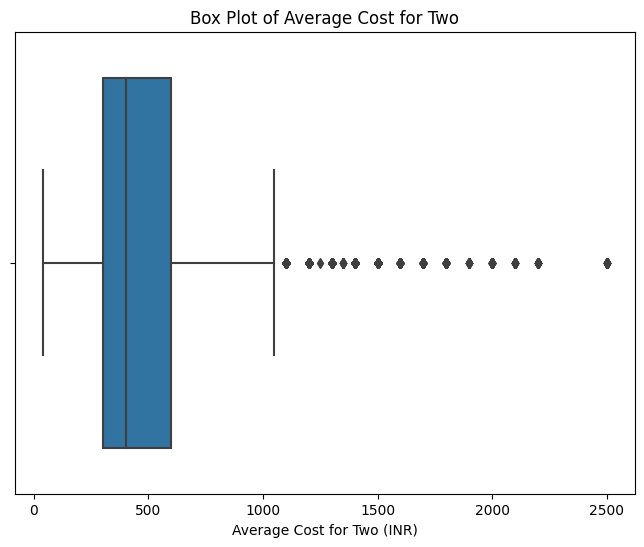

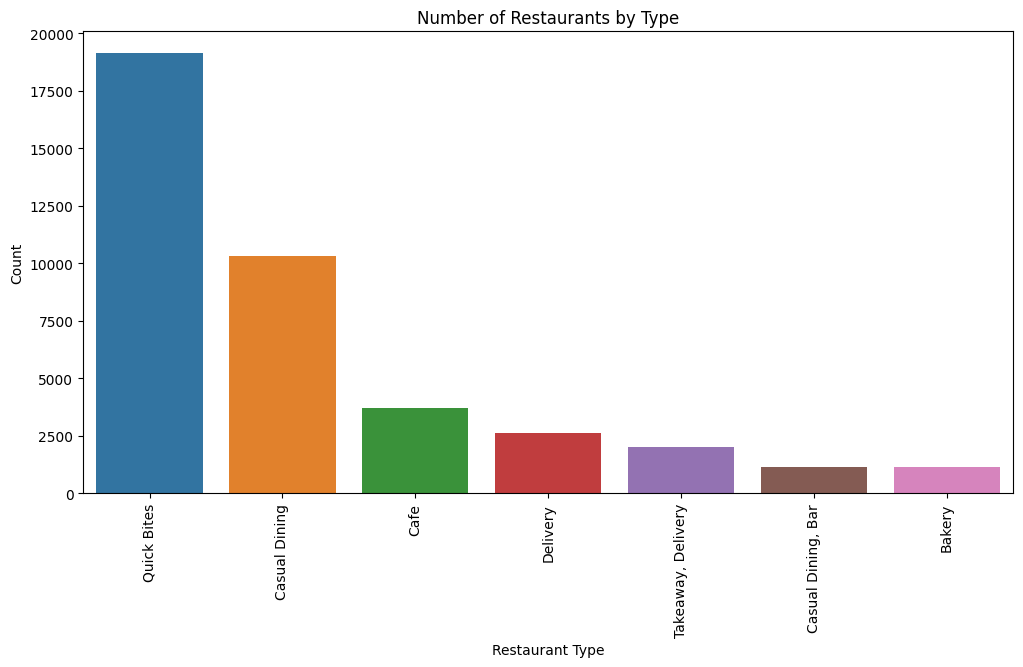

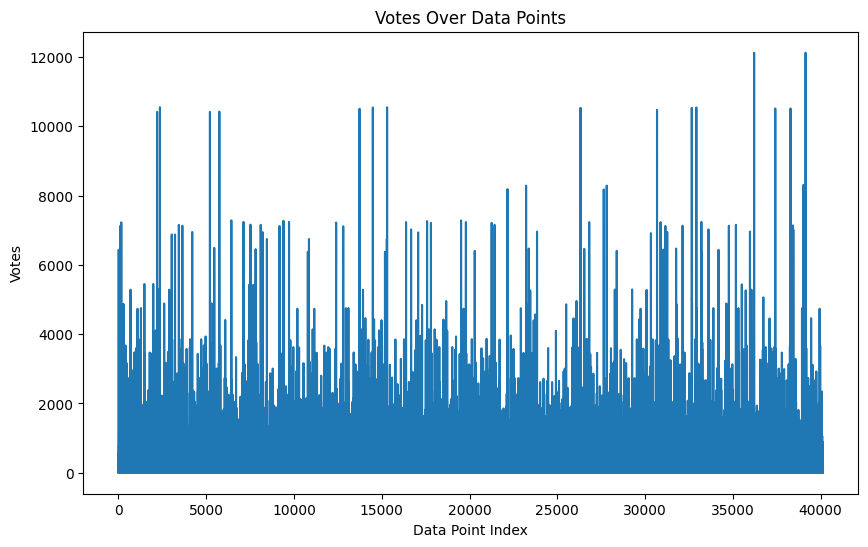

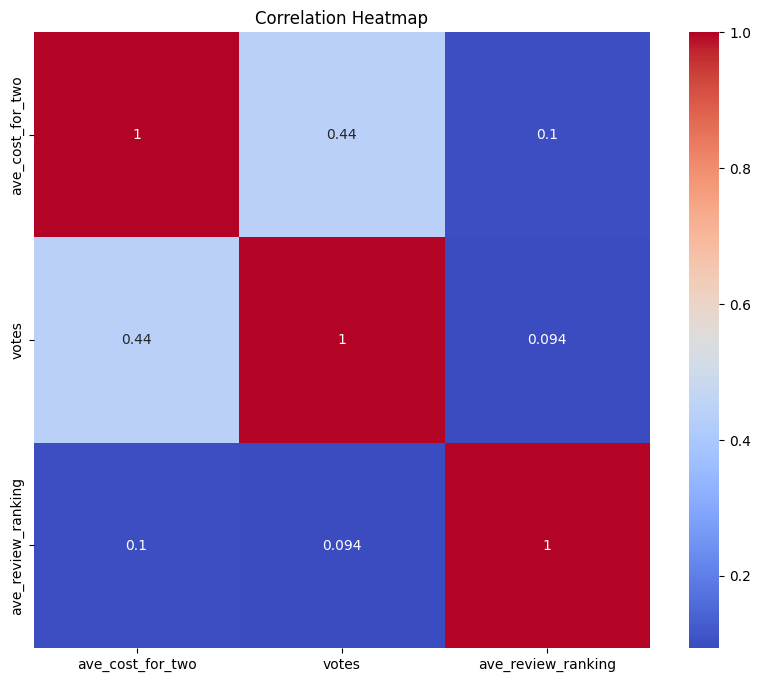

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Summary Statistics
summary_stats = FoodieBay_data.describe()

# Data Visualization

# Box plot for 'ave_cost_for_two'
plt.figure(figsize=(8, 6))
sns.boxplot(data=FoodieBay_data, x='ave_cost_for_two')
plt.xlabel('Average Cost for Two (INR)')
plt.title('Box Plot of Average Cost for Two')
plt.show()

# Bar Chart for 'rest_type'
plt.figure(figsize=(12, 6))
rest_type_counts = FoodieBay_data['rest_type'].value_counts()
sns.barplot(x=rest_type_counts.index, y=rest_type_counts.values)
plt.xlabel('Restaurant Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Number of Restaurants by Type')
plt.show()

# Line plot for 'votes' (or any other numeric variable)
plt.figure(figsize=(10, 6))
sns.lineplot(data=FoodieBay_data, x=FoodieBay_data.index, y='votes')  # Using the index as x-axis
plt.xlabel('Data Point Index')
plt.ylabel('Votes')
plt.title('Votes Over Data Points')
plt.show()

# Correlation Heatmap
correlation_matrix = FoodieBay_data[['ave_cost_for_two', 'votes', 'ave_review_ranking']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

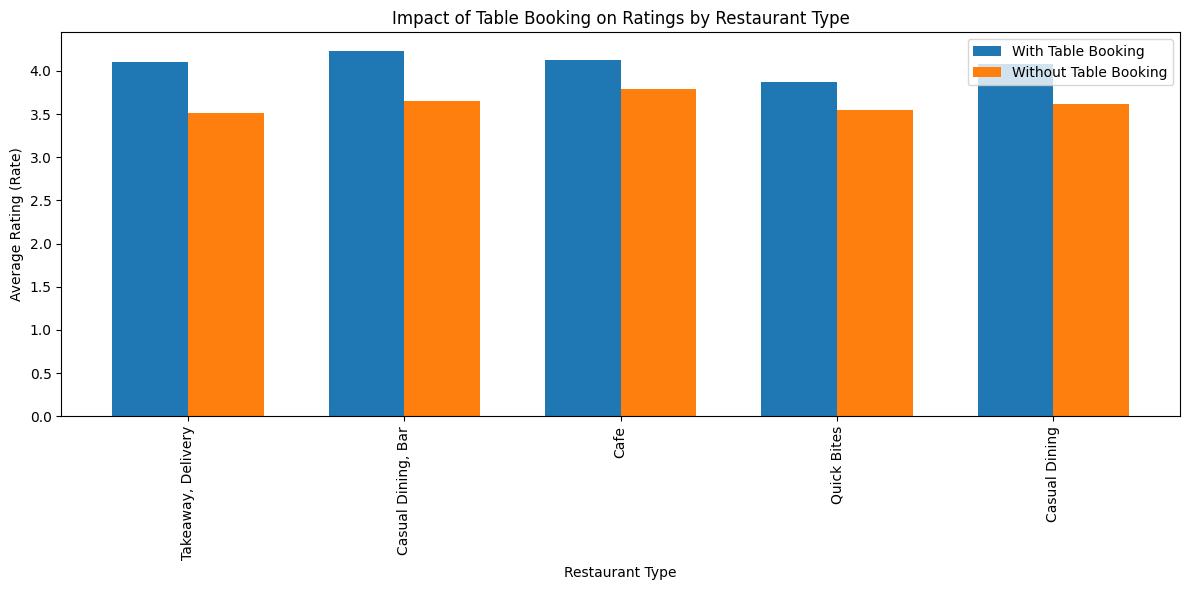

In [6]:
# Regarding the former, the client has requested the following:

# 1. How many restaurants offer table booking, and what impact does it have on ratings (rate)?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Filter the data for restaurants with and without table booking
with_table_booking = FoodieBay_data[FoodieBay_data['book_table'] == 'Yes']
without_table_booking = FoodieBay_data[FoodieBay_data['book_table'] == 'No']

# Calculate the average rating for restaurants with and without table booking
avg_rating_with_booking = with_table_booking['rate'].mean()
avg_rating_without_booking = without_table_booking['rate'].mean()

# Group the data by 'rest_type' and calculate average ratings
avg_ratings_by_rest_type_with_booking = with_table_booking.groupby('rest_type')['rate'].mean()
avg_ratings_by_rest_type_without_booking = without_table_booking.groupby('rest_type')['rate'].mean()

# Get common restaurant types
common_rest_types = set(avg_ratings_by_rest_type_with_booking.index).intersection(avg_ratings_by_rest_type_without_booking.index)

# Filter data to include only common restaurant types
avg_ratings_by_rest_type_with_booking = avg_ratings_by_rest_type_with_booking.loc[common_rest_types]
avg_ratings_by_rest_type_without_booking = avg_ratings_by_rest_type_without_booking.loc[common_rest_types]

# Create a grouped bar chart to compare average ratings by restaurant type
plt.figure(figsize=(12, 6))

# Bar width for each group
bar_width = 0.35

# Generate x-axis positions for the bars
x = range(len(common_rest_types))

plt.bar(x, avg_ratings_by_rest_type_with_booking, width=bar_width, label='With Table Booking', align='center')
plt.bar([i + bar_width for i in x], avg_ratings_by_rest_type_without_booking, width=bar_width, label='Without Table Booking', align='center')

# Set x-axis labels
plt.xlabel('Restaurant Type')
plt.xticks([i + bar_width/2 for i in x], common_rest_types, rotation=90)

# Set y-axis label and title
plt.ylabel('Average Rating (Rate)')
plt.title('Impact of Table Booking on Ratings by Restaurant Type')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

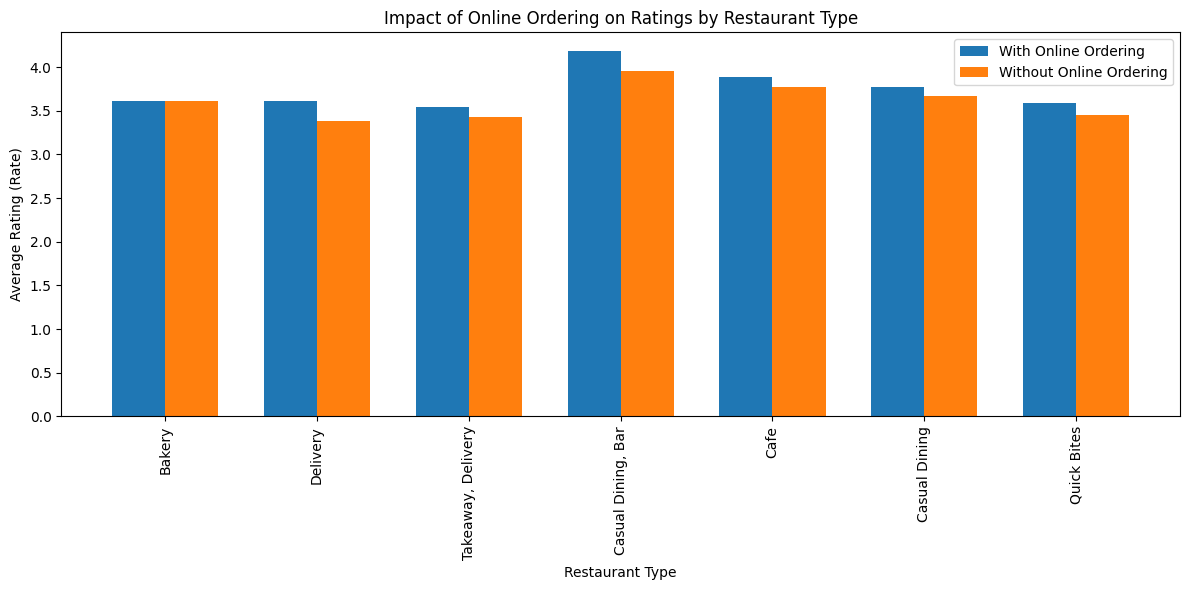

Average Rating with Online Ordering: 3.69229997720538
Average Rating without Online Ordering: 3.579348818338574


In [7]:
# Regarding the former, the client has requested the following:

# 2. How many restaurants offer online ordering, and what impact does it have on ratings (rate)?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Filter the data for restaurants with and without online ordering
with_online_ordering = FoodieBay_data[FoodieBay_data['online_order'] == 'Yes']
without_online_ordering = FoodieBay_data[FoodieBay_data['online_order'] == 'No']

# Calculate the average rating for restaurants with and without online ordering
avg_rating_with_online_ordering = with_online_ordering['rate'].mean()
avg_rating_without_online_ordering = without_online_ordering['rate'].mean()

# Group the data by 'rest_type' and calculate average ratings
avg_ratings_by_rest_type_with_online_ordering = with_online_ordering.groupby('rest_type')['rate'].mean()
avg_ratings_by_rest_type_without_online_ordering = without_online_ordering.groupby('rest_type')['rate'].mean()

# Get common restaurant types
common_rest_types = set(avg_ratings_by_rest_type_with_online_ordering.index).intersection(avg_ratings_by_rest_type_without_online_ordering.index)

# Filter data to include only common restaurant types
avg_ratings_by_rest_type_with_online_ordering = avg_ratings_by_rest_type_with_online_ordering.loc[common_rest_types]
avg_ratings_by_rest_type_without_online_ordering = avg_ratings_by_rest_type_without_online_ordering.loc[common_rest_types]

# Create a grouped bar chart to compare average ratings by restaurant type
plt.figure(figsize=(12, 6))

# Bar width for each group
bar_width = 0.35

# Generate x-axis positions for the bars
x = range(len(common_rest_types))

plt.bar(x, avg_ratings_by_rest_type_with_online_ordering, width=bar_width, label='With Online Ordering', align='center')
plt.bar([i + bar_width for i in x], avg_ratings_by_rest_type_without_online_ordering, width=bar_width, label='Without Online Ordering', align='center')

# Set x-axis labels
plt.xlabel('Restaurant Type')
plt.xticks([i + bar_width/2 for i in x], common_rest_types, rotation=90)

# Set y-axis label and title
plt.ylabel('Average Rating (Rate)')
plt.title('Impact of Online Ordering on Ratings by Restaurant Type')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()
print("Average Rating with Online Ordering:", avg_rating_with_online_ordering)
print("Average Rating without Online Ordering:", avg_rating_without_online_ordering)

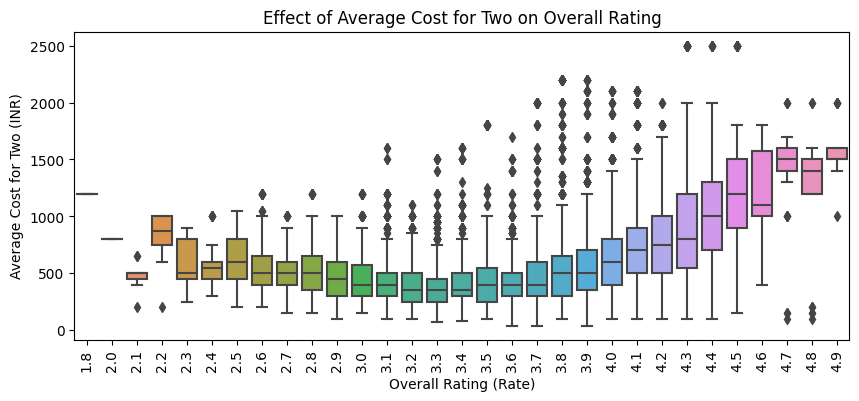

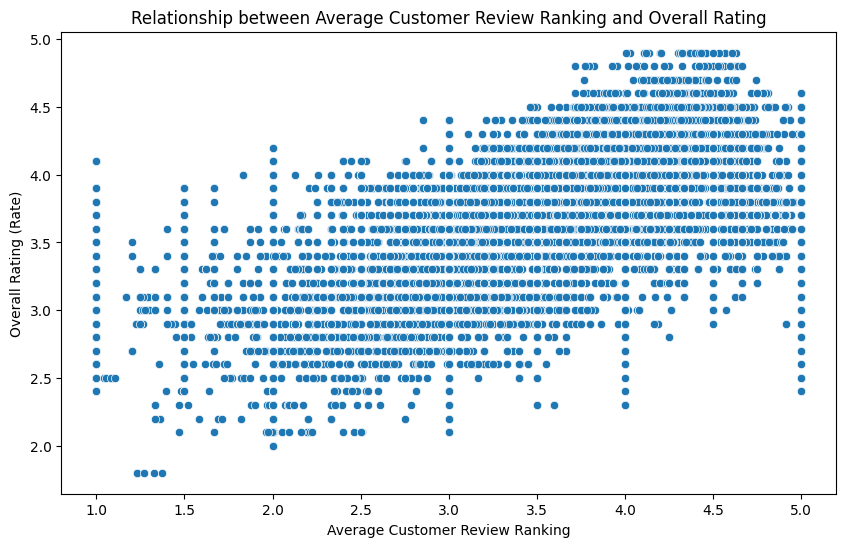

In [8]:
# Regarding the former, the client has requested the following:

# 3. What is the effect of the average cost for two (in INR) and average customer review ranking (ave_review_ranking in the dataset) on overall ratings (rate)?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Effect of 'ave_cost_for_two' on 'rate'
plt.figure(figsize=(10, 4))
sns.boxplot(data=FoodieBay_data, x='rate', y='ave_cost_for_two')
plt.xlabel('Overall Rating (Rate)')
plt.ylabel('Average Cost for Two (INR)')
plt.title('Effect of Average Cost for Two on Overall Rating')
plt.xticks(rotation=90)
plt.show()

# Scatter plot to show the relationship between 'ave_review_ranking' and 'rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=FoodieBay_data, x='ave_review_ranking', y='rate')
plt.xlabel('Average Customer Review Ranking')
plt.ylabel('Overall Rating (Rate)')
plt.title('Relationship between Average Customer Review Ranking and Overall Rating')
plt.show()

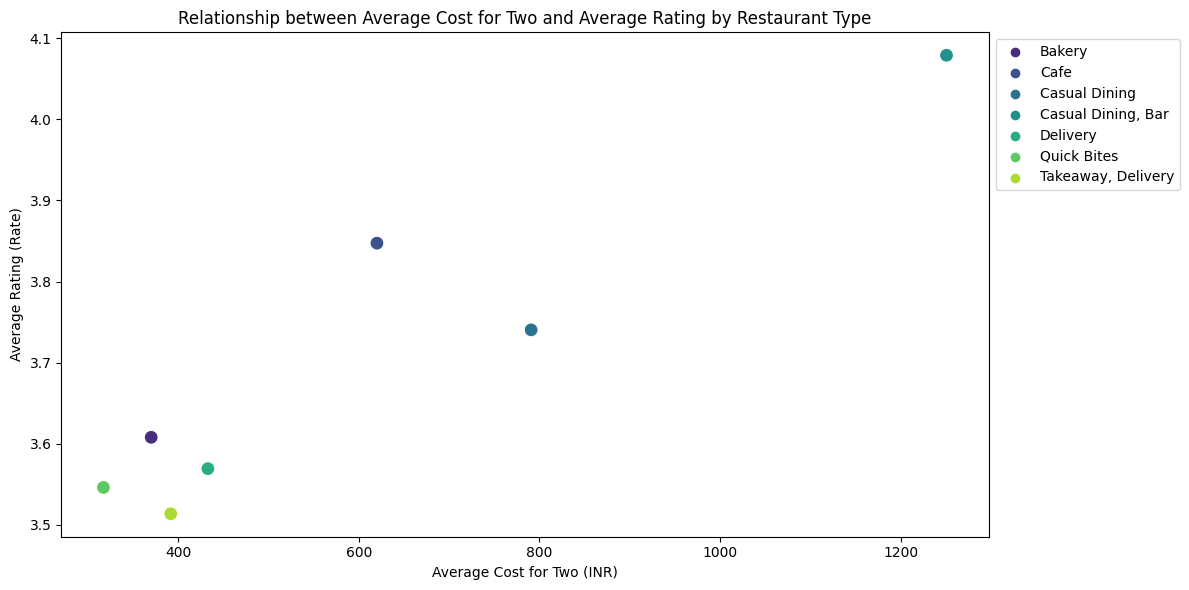

In [9]:
# Regarding the former, the client has requested the following:

# 4. How do ratings (rate) and average cost for two vary among the restaurant types?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Group data by restaurant type and calculate the average cost for two and average rating
avg_cost_by_type = FoodieBay_data.groupby('rest_type')['ave_cost_for_two'].mean().reset_index()
avg_rating_by_type = FoodieBay_data.groupby('rest_type')['rate'].mean().reset_index()

# Create a scatter plot to show the relationship between "Average Cost for Two" and "Average Rating"
plt.figure(figsize=(12, 6))

sns.scatterplot(data=avg_cost_by_type, x='ave_cost_for_two', y=avg_rating_by_type['rate'], hue=avg_cost_by_type['rest_type'], palette='viridis', s=100)
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Average Rating (Rate)')
plt.title('Relationship between Average Cost for Two and Average Rating by Restaurant Type')

# Add legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Top-Rated Restaurants:
                                name  rate
1715  Asia Kitchen By Mainland China   4.9
2106  Asia Kitchen By Mainland China   4.9
3031  Asia Kitchen By Mainland China   4.9
4693  Asia Kitchen By Mainland China   4.9
5461       AB's - Absolute Barbecues   4.9
5578                        Flechazo   4.9
6272  Asia Kitchen By Mainland China   4.9
6516  Asia Kitchen By Mainland China   4.9
7655  Asia Kitchen By Mainland China   4.9
7816       AB's - Absolute Barbecues   4.9

Lowest-Rated Restaurants:
                                   name  rate
2342   Alibi - Maya International Hotel   1.8
5897   Alibi - Maya International Hotel   1.8
15601  Alibi - Maya International Hotel   1.8
19663  Alibi - Maya International Hotel   1.8
36253  Alibi - Maya International Hotel   1.8
4890                            Bhagini   2.0
34136                           Bhagini   2.0
560      Midnight Hunger Solutions 24/7   2.1
4557                     Ammi's Biryani   2.1
5330             

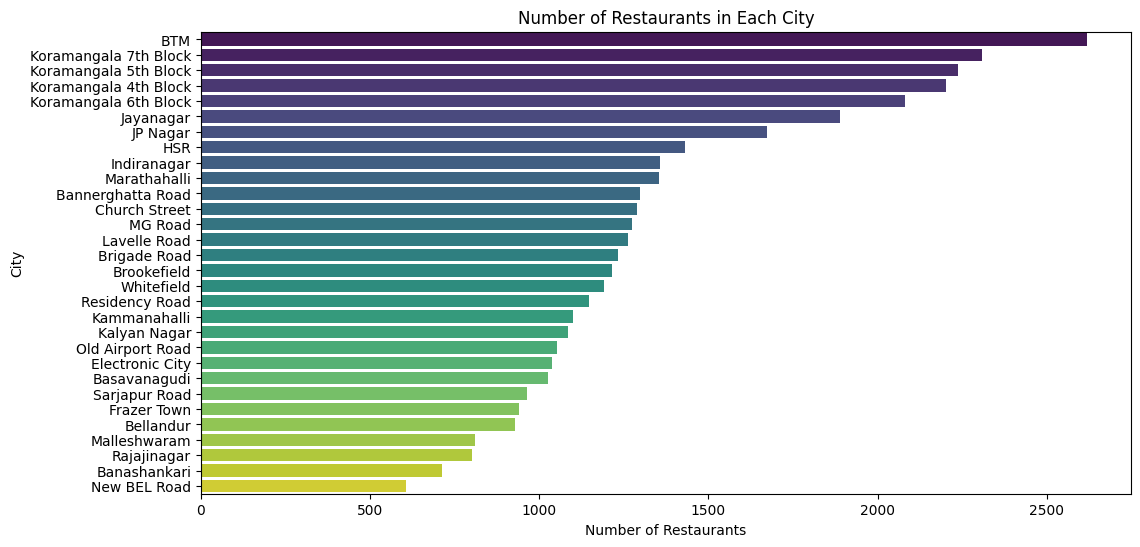

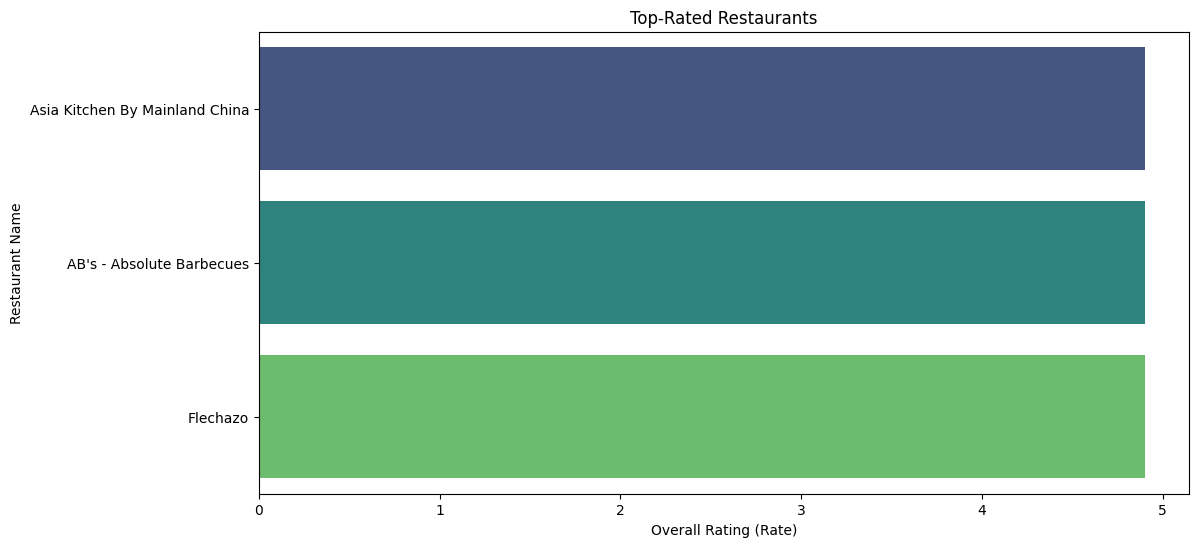

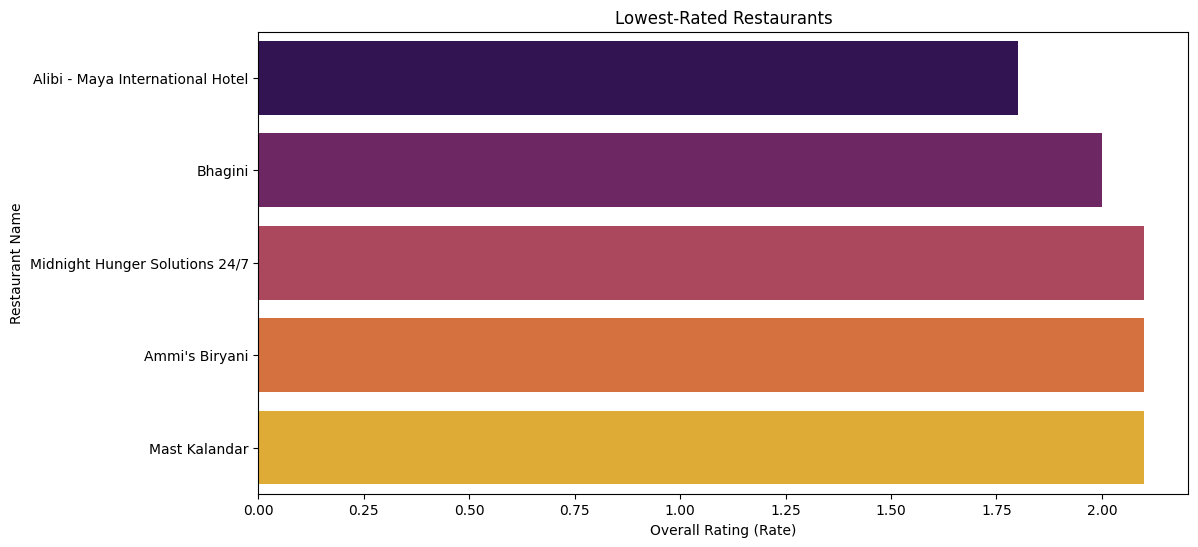

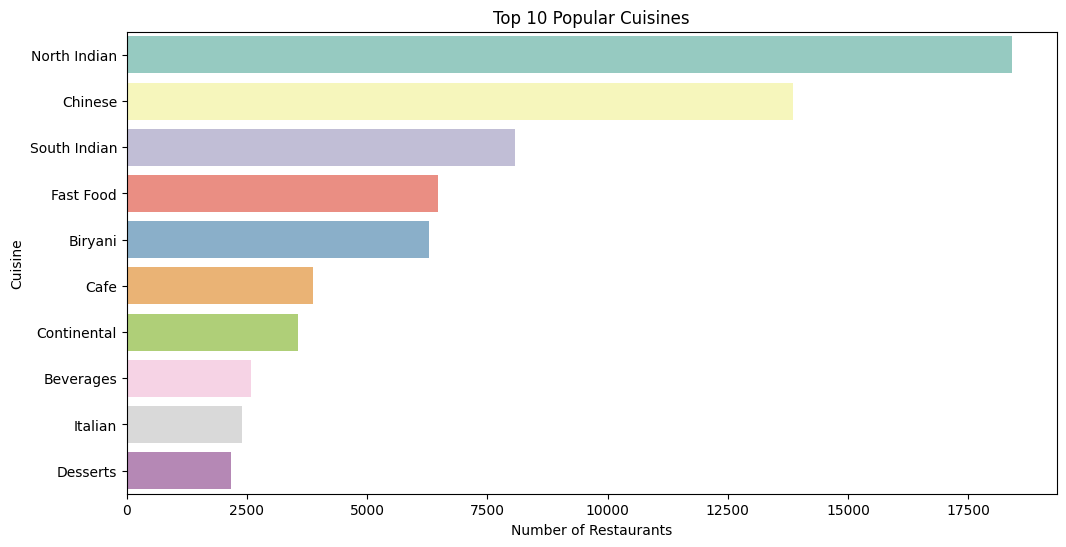

In [10]:
# Regarding the former, the client has requested the following:

# 5. Any additional insights about the restaurants, cities, and cuisines; for example, but not necessarily, what are the best- or worst- performing restaurants,
# or which city has the greatest number of restaurants?

# To gain additional insights about the restaurants, cities, and cuisines in the dataset, you can perform various analyses and visualizations.
# Here are some examples of additional insights you can explore:

# Best-Performing and Worst-Performing Restaurants:
#   To identify the best-performing restaurants, you can sort the dataset by 'rate' (overall rating) in descending order and display the top-rated restaurants.
#   To find the worst-performing restaurants, you can sort the dataset by 'rate' in ascending order and display the lowest-rated restaurants.

# City with the Most Restaurants:
#   You can count the number of restaurants in each city using value_counts() on the 'listed_in_city' column and visualize it using a bar chart.

# Popular Cuisines:
#   Determine the most popular cuisines by counting the occurrences of each cuisine in the 'cuisines' column and visualizing the top cuisines.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Find the top-rated restaurants
top_rated_restaurants = FoodieBay_data.nlargest(10, 'rate')

# Find the lowest-rated restaurants
lowest_rated_restaurants = FoodieBay_data.nsmallest(10, 'rate')

# Count the number of restaurants in each city
city_counts = FoodieBay_data['listed_in_city'].value_counts()

# Find the most popular cuisines
cuisine_counts = FoodieBay_data['cuisines'].str.split(', ').explode().value_counts()
top_cuisines = cuisine_counts.head(10)

# Display the results
print("Top-Rated Restaurants:")
print(top_rated_restaurants[['name', 'rate']])
print("\nLowest-Rated Restaurants:")
print(lowest_rated_restaurants[['name', 'rate']])
print("\nNumber of Restaurants in Each City:")
print(city_counts)
print("\nTop 10 Popular Cuisines:")
print(top_cuisines)

# Visualize the results

# Plot for number of restaurants in each city using a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Number of Restaurants in Each City')

plt.show()

# Plot for top-rated and lowest-rated restaurants using a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_restaurants['rate'], y=top_rated_restaurants['name'], palette='viridis')
plt.xlabel('Overall Rating (Rate)')
plt.ylabel('Restaurant Name')
plt.title('Top-Rated Restaurants')

plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_rated_restaurants['rate'], y=lowest_rated_restaurants['name'], palette='inferno')
plt.xlabel('Overall Rating (Rate)')
plt.ylabel('Restaurant Name')
plt.title('Lowest-Rated Restaurants')

plt.show()

# Plot for top 10 popular cuisines using a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='Set3')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.title('Top 10 Popular Cuisines')

plt.show()

The city with the greatest number of restaurants is BTM with 2618 restaurants.

Top 10 Best-Performing Restaurants:
                                name  rate
1715  Asia Kitchen By Mainland China   4.9
2106  Asia Kitchen By Mainland China   4.9
3031  Asia Kitchen By Mainland China   4.9
4693  Asia Kitchen By Mainland China   4.9
5461       AB's - Absolute Barbecues   4.9
5578                        Flechazo   4.9
6272  Asia Kitchen By Mainland China   4.9
6516  Asia Kitchen By Mainland China   4.9
7655  Asia Kitchen By Mainland China   4.9
7816       AB's - Absolute Barbecues   4.9

Top 10 Worst-Performing Restaurants:
                                   name  rate
2342   Alibi - Maya International Hotel   1.8
5897   Alibi - Maya International Hotel   1.8
15601  Alibi - Maya International Hotel   1.8
19663  Alibi - Maya International Hotel   1.8
36253  Alibi - Maya International Hotel   1.8
4890                            Bhagini   2.0
34136                           Bhagini   2.0
560  

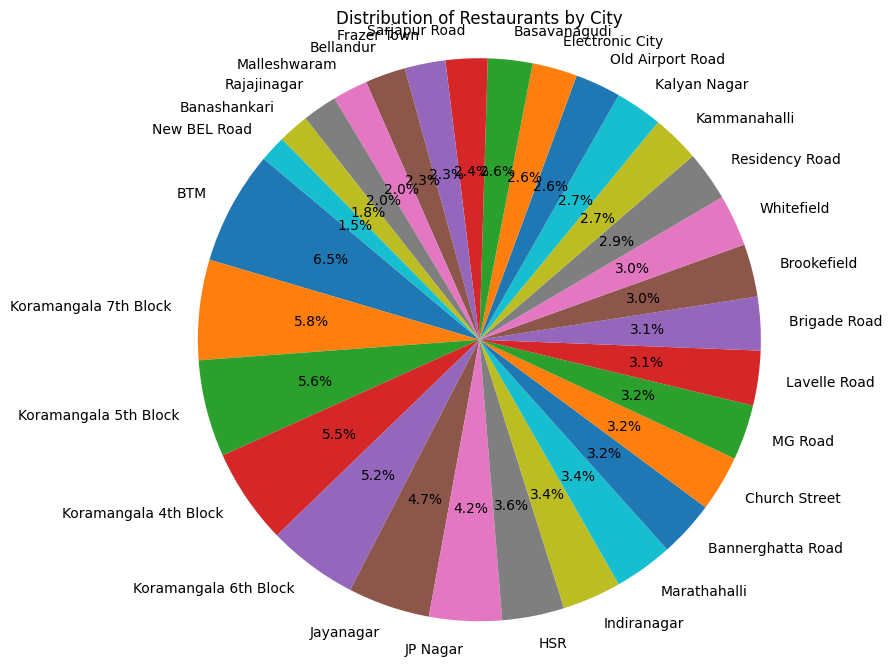

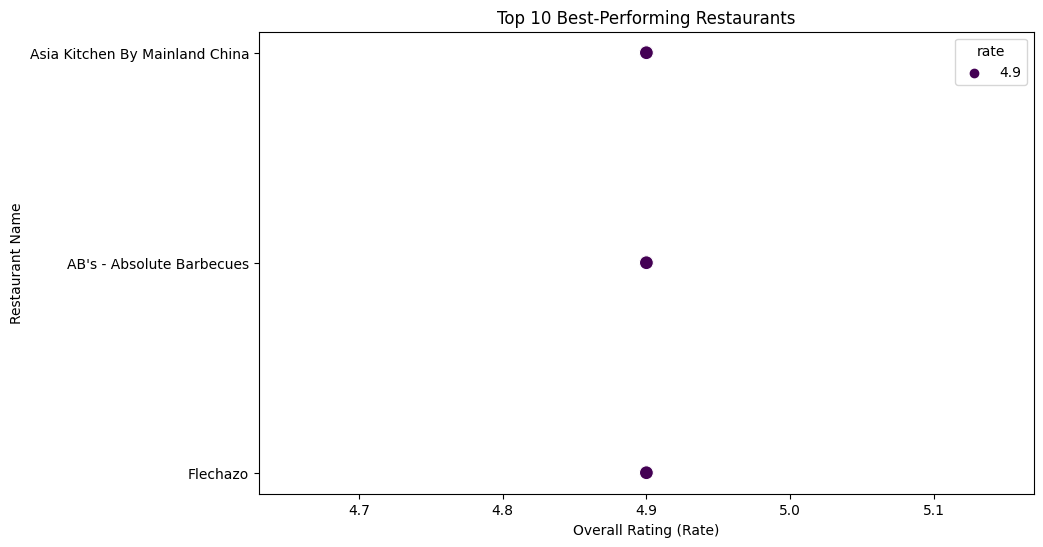

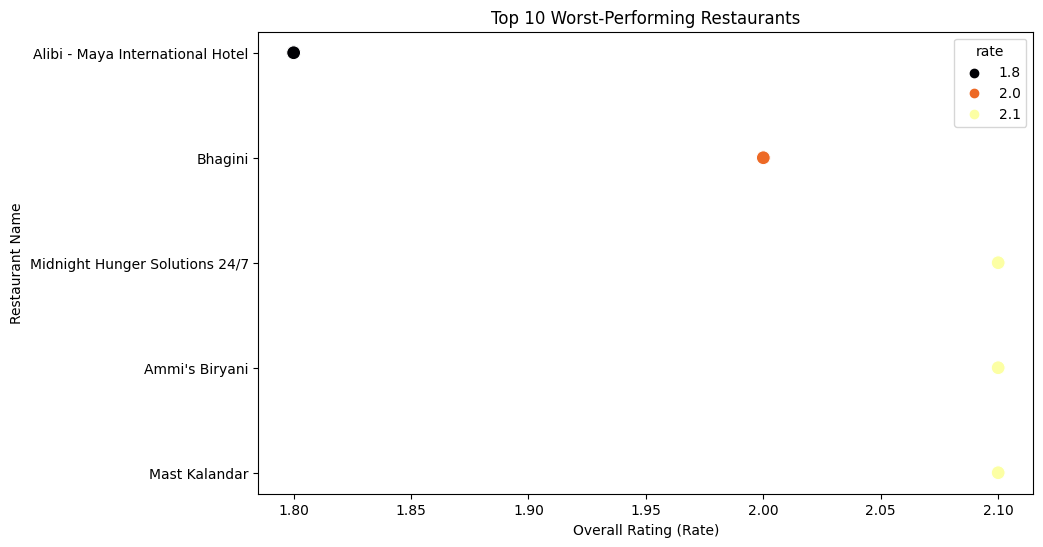

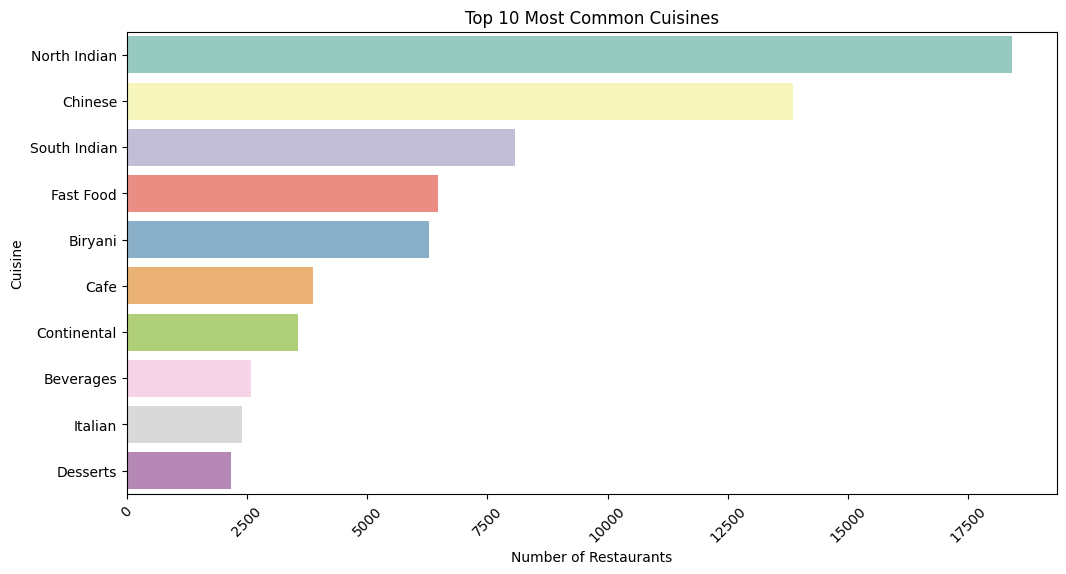

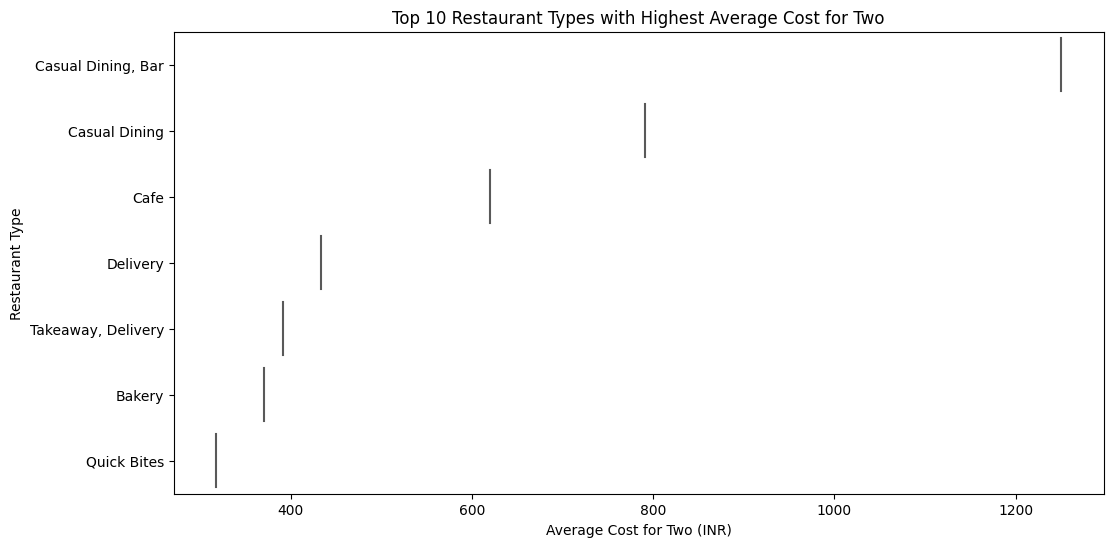

In [11]:
# continuous of Q.5

# To gain additional insights about the restaurants, cities, and cuisines.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# City with the greatest number of restaurants
city_counts = FoodieBay_data['listed_in_city'].value_counts()
max_city = city_counts.idxmax()
max_count = city_counts.max()
print(f"The city with the greatest number of restaurants is {max_city} with {max_count} restaurants.")

# Best-performing restaurants (top 10 based on ratings)
top_restaurants = FoodieBay_data.nlargest(10, 'rate')[['name', 'rate']]
print("\nTop 10 Best-Performing Restaurants:")
print(top_restaurants)

# Worst-performing restaurants (bottom 10 based on ratings)
bottom_restaurants = FoodieBay_data.nsmallest(10, 'rate')[['name', 'rate']]
print("\nTop 10 Worst-Performing Restaurants:")
print(bottom_restaurants)

# Most common cuisines
common_cuisines = FoodieBay_data['cuisines'].str.split(', ').explode().str.strip().value_counts().nlargest(10)
print("\nTop 10 Most Common Cuisines:")
print(common_cuisines)

# Restaurant types with the highest average cost for two
avg_cost_by_type = FoodieBay_data.groupby('rest_type')['ave_cost_for_two'].mean().nlargest(10)
print("\nTop 10 Restaurant Types with Highest Average Cost for Two:")
print(avg_cost_by_type)

# Visualize the insights using different graphs

# Pie chart for the distribution of restaurants by city
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Restaurants by City')
plt.show()

# Scatter plot for top-rated restaurants
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_restaurants, x='rate', y='name', hue=top_restaurants['rate'], palette='viridis', s=100)
plt.xlabel('Overall Rating (Rate)')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Best-Performing Restaurants')
plt.show()

# Scatter plot for lowest-rated restaurants
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bottom_restaurants, x='rate', y='name', hue=bottom_restaurants['rate'], palette='inferno', s=100)
plt.xlabel('Overall Rating (Rate)')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Worst-Performing Restaurants')
plt.show()

# Bar plot for top 10 common cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=common_cuisines.values, y=common_cuisines.index, palette='Set3')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.title('Top 10 Most Common Cuisines')
plt.xticks(rotation=45)
plt.show()

# Violin plot for top 10 restaurant types with highest average cost for two
plt.figure(figsize=(12, 6))
sns.violinplot(x=avg_cost_by_type.values, y=avg_cost_by_type.index, palette='coolwarm', inner='stick')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Restaurant Type')
plt.title('Top 10 Restaurant Types with Highest Average Cost for Two')
plt.show()

In [12]:
# Supervised Machine Learning (Predicting Restaurant Ratings):

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Handling Missing Values with Mean Imputation
FoodieBay_data['ave_cost_for_two'].fillna(FoodieBay_data['ave_cost_for_two'].mean(), inplace=True)
FoodieBay_data['ave_review_ranking'].fillna(FoodieBay_data['ave_review_ranking'].mean(), inplace=True)
FoodieBay_data['rate'].fillna(FoodieBay_data['rate'].mean(), inplace=True)

# Select features and target variable
X = FoodieBay_data[['ave_cost_for_two', 'ave_review_ranking']]
y = FoodieBay_data['rate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Model Evaluation
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Evaluate Linear Regression model
mae_lr, mse_lr, r2_lr = evaluate_model(lr_model, X_test, y_test)

# Evaluate Random Forest model
mae_rf, mse_rf, r2_rf = evaluate_model(rf_model, X_test, y_test)

print("Linear Regression Metrics:")
print(f"Mean Absolute Error: {mae_lr}")
print(f"Mean Squared Error: {mse_lr}")
print(f"R2 Score: {r2_lr}")

print("\nRandom Forest Metrics:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R2 Score: {r2_rf}")

# Model Selection Criteria (Choose the model with better performance)
best_model = "Linear Regression" if r2_lr > r2_rf else "Random Forest"
print(f"\nBest Model: {best_model}")

Linear Regression Metrics:
Mean Absolute Error: 0.2489437320345244
Mean Squared Error: 0.1043333543176946
R2 Score: 0.2752368824992897

Random Forest Metrics:
Mean Absolute Error: 0.18854645438419437
Mean Squared Error: 0.07164555697363525
R2 Score: 0.5023062608610087

Best Model: Random Forest


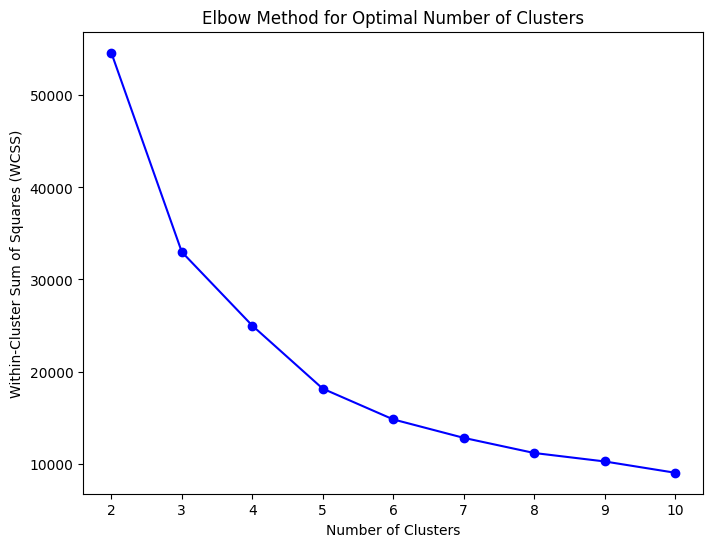

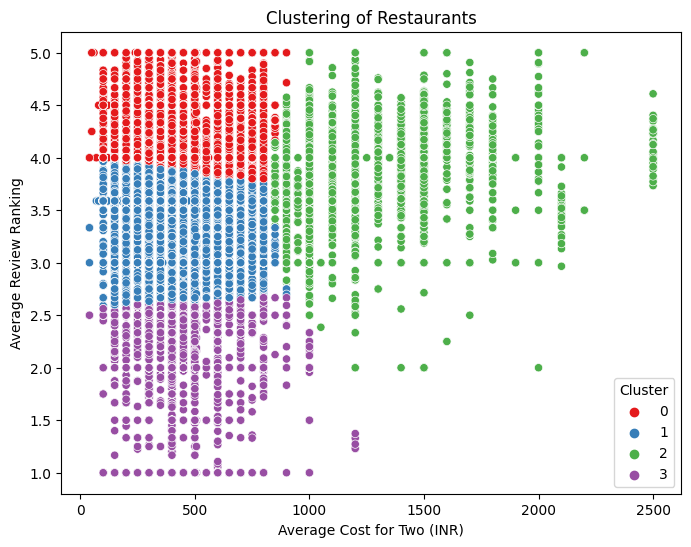

The chosen number of clusters is 4 based on the elbow method.


In [15]:
# Unsupervised Machine Learning (Clustering Similar Restaurants):

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data
FoodieBay_data = pd.read_csv("FoodieBay.csv")

# Handling Missing Values
FoodieBay_data['ave_cost_for_two'].fillna(FoodieBay_data['ave_cost_for_two'].mean(), inplace=True)
FoodieBay_data['ave_review_ranking'].fillna(FoodieBay_data['ave_review_ranking'].mean(), inplace=True)

# Select relevant numeric features for clustering
numeric_features = FoodieBay_data[['ave_cost_for_two', 'ave_review_ranking']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Determine the optimal number of clusters using the elbow method
inertia_values = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the elbow method, choose the optimal number of clusters (e.g., 4)
optimal_num_clusters = 4

# Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
FoodieBay_data['cluster_label'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=FoodieBay_data, x='ave_cost_for_two', y='ave_review_ranking', hue='cluster_label', palette='Set1')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Average Review Ranking')
plt.title('Clustering of Restaurants')
plt.legend(title='Cluster')
plt.show()

# Justification for the chosen number of clusters (Elbow Method)
print(f"The chosen number of clusters is {optimal_num_clusters} based on the elbow method.")